### Init

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
with open("../inputs/input14.txt") as file: raw_data = file.read()
ConvertToInt = lambda rd: list(map(int,re.findall(r"-*[0-9]+", rd)))
robotData = np.array([ConvertToInt(rd) for rd in raw_data.split("\n")])

### Custom Function(s)

In [5]:
class Robot:
    def __init__(self, _pos, _vel, _id):
        self.pos = _pos
        self.vel = _vel
        self.id = _id
        self.width = 101 # 11 or 101
        self.height = 103 # 7 or 103

    def __repr__(self):
        return str(self.pos)

    def Move(self):
        self.pos += self.vel
        numReal, numImag = self.pos.real, self.pos.imag
        numReal = numReal % self.width
        numImag = numImag % self.height
        self.pos = numReal + numImag*1j

    def FindQuadrant(self):
        numReal, numImag = self.pos.real, self.pos.imag
        if (numReal == (self.width-1)/2) or (numImag == (self.height-1)/2):
            return "Mid"
        else:
            quadScore = 0
            if numReal < (self.width-1)/2:
                if numImag < (self.height-1)/2:
                    return "NW"
                else:
                    return "SW"
            else:
                if numImag < (self.height-1)/2:
                    return "NE"
                else:
                    return "SE"

def PlotRobots(Robots):
    grid = np.zeros((103, 101))
    for idx in range(len(Robots)):
        posx = int(Robots[idx].pos.real)
        posy = int(Robots[idx].pos.imag)
        grid[posy, posx] = 1
    return grid

### Part 1

In [7]:
Robots, Quadrants = {},{"Mid":0, "NW":0, "SW":0, "NE":0, "SE":0}
for idx,metaData in enumerate(robotData):
    position = metaData[0] + metaData[1]*1j
    velocity = metaData[2] + metaData[3]*1j
    Robots[idx] = Robot(position, velocity, idx)


In [8]:
for _ in range(100):
    for idx in range(len(Robots)):
        Robots[idx].Move()

In [9]:
cnt = 1

for idx in range(len(Robots)):
    Quadrants[Robots[idx].FindQuadrant()] += 1

for k,v in Quadrants.items():
    if k != "Mid":
        cnt *= v
cnt

215476074

### Part 2

6285


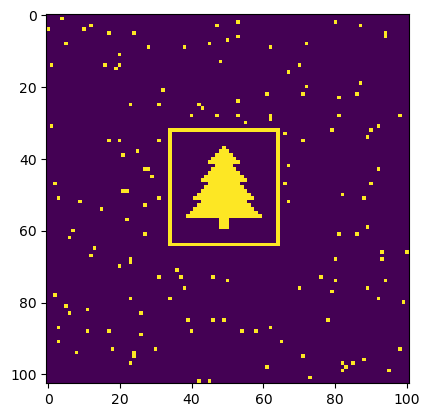

In [11]:
Robots, Quadrants = {},{"Mid":0, "NW":0, "SW":0, "NE":0, "SE":0}
for idx,metaData in enumerate(robotData):
    position = metaData[0] + metaData[1]*1j
    velocity = metaData[2] + metaData[3]*1j
    Robots[idx] = Robot(position, velocity, idx)
Tracker = {}
# [ 2, 105, ...] horizontal bar, cyclic at 2  + 103x
# [23, 124, ...] vertical   bar, cyclic at 23 + 101x
# The above sequences happen to lin up at x = 61, due to 23 + 101*(x+1) = 2 + 103*, add 1 due to python 0-indexing.
for iteration in range(2+103*61): # 10404-cycle as hard upper limit
    for idx in range(len(Robots)):
        Robots[idx].Move()

print(2+103*61)
grid = PlotRobots(Robots)
plt.imshow(grid)